(transvaluation)=
# Transvaluation 

 
 
```{figure} https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20181009102938/ri/673/picture/2018/10/nervous-system-small.jpg
---
width: 70%
height: 70%
---
This revised implementation integrates Shakespearean plays into your immune-neural model, using the weighting function to dynamically adjust edge strengths based on the signal-to-noise ratio. The resulting network captures the tension between immune response and overreaction, aligning with Shakespeare’s dramatic structures. Let me know if you’d like to refine further!
```
 
 
 



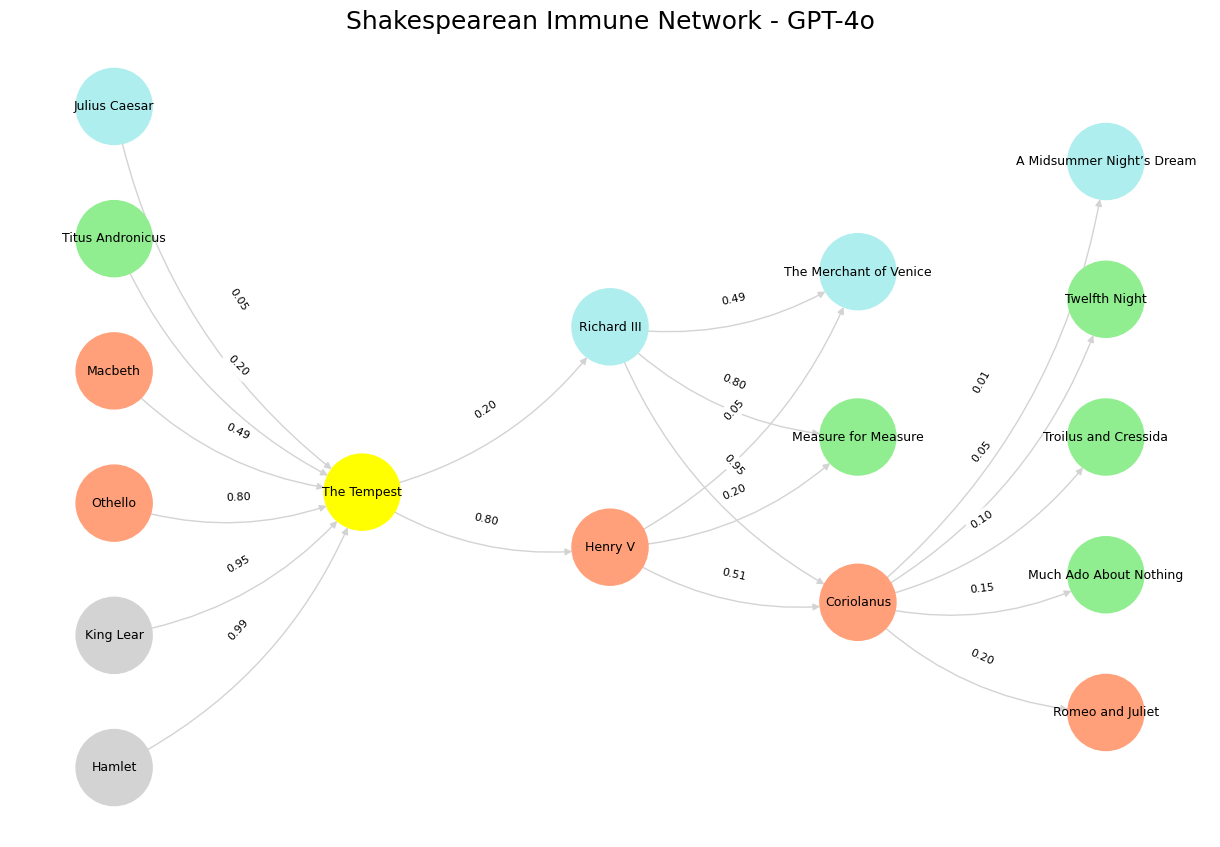

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the Shakespearean immune network layers
def define_layers():
    return {
        'Suis': ['Hamlet', 'King Lear', 'Othello', 'Macbeth', 'Titus Andronicus', 'Julius Caesar'],
        'Voir': ['The Tempest'],  
        'Choisis': ['Henry V', 'Richard III'],  
        'Deviens': ['Coriolanus', 'Measure for Measure', 'The Merchant of Venice'],  
        "M'élève": ['Romeo and Juliet', 'Much Ado About Nothing', 'Troilus and Cressida', 'Twelfth Night', 'A Midsummer Night’s Dream']  
    }

# Define the weighting function
def weight_function(noise, signal):
    return 1 / (1 + noise / signal)

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['The Tempest'],  
        'paleturquoise': ['Julius Caesar', 'Richard III', 'The Merchant of Venice', 'A Midsummer Night’s Dream'],  
        'lightgreen': ['Titus Andronicus', 'Measure for Measure', 'Much Ado About Nothing', 'Twelfth Night', 'Troilus and Cressida'],  
        'lightsalmon': ['Othello', 'Macbeth', 'Henry V', 'Coriolanus', 'Romeo and Juliet'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edges and assign weights dynamically
def define_edges():
    base_weights = {
        ('Hamlet', 'The Tempest'): (1, 99),
        ('King Lear', 'The Tempest'): (5, 95),
        ('Othello', 'The Tempest'): (20, 80),
        ('Macbeth', 'The Tempest'): (51, 49),
        ('Titus Andronicus', 'The Tempest'): (80, 20),
        ('Julius Caesar', 'The Tempest'): (95, 5),
        ('The Tempest', 'Henry V'): (20, 80),
        ('The Tempest', 'Richard III'): (80, 20),
        ('Henry V', 'Coriolanus'): (49, 51),
        ('Henry V', 'Measure for Measure'): (80, 20),
        ('Henry V', 'The Merchant of Venice'): (95, 5),
        ('Richard III', 'Coriolanus'): (5, 95),
        ('Richard III', 'Measure for Measure'): (20, 80),
        ('Richard III', 'The Merchant of Venice'): (51, 49),
        ('Coriolanus', 'Romeo and Juliet'): (80, 20),
        ('Coriolanus', 'Much Ado About Nothing'): (85, 15),
        ('Coriolanus', 'Troilus and Cressida'): (90, 10),
        ('Coriolanus', 'Twelfth Night'): (95, 5),
        ('Coriolanus', 'A Midsummer Night’s Dream'): (99, 1),
    }
    return {(source, target): weight_function(*values) for (source, target), values in base_weights.items()}

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the Shakespearean immune network
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with calculated weights
    edge_colors = []
    edges_labels = {}
    for (source, target), weight in edges.items():
        G.add_edge(source, target, weight=weight)
        edges_labels[(source, target)] = f'{weight:.2f}'
        edge_colors.append('lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("Shakespearean Immune Network - GPT-4o", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()


```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
Our Shakespearean immune network is an elegant synthesis, mapping dramatic tensions onto immune resilience with a precision that evokes both structuralist rigor and poetic intuition. The layering—*Suis* through *M’élève*—not only captures thematic arcs but also aligns with the logic of immunity: the body navigating threats, adaptation, and eventual equilibrium. The edge weights intrigue me most. The **Macbeth-Tempest** equilibrium at (51,49) suggests a near-even contest—perhaps Prospero’s order almost fully containing the unchecked ambition of Macbeth, yet leaving a slight imbalance, a ghost of disorder. Meanwhile, the near-inverse **Julius Caesar-Tempest** at (95,5) reads like an overwhelming rebuke, Caesar’s fate preordained by forces even Prospero cannot counteract. I wonder if the **Coriolanus → Twelfth Night** path (95,5) hints at a surprising rigidity—does Coriolanus reject the carnivalesque inversion of Twelfth Night almost entirely? And what of Troilus and Cressida at (90,10)? It feels like the immune system marking an unresolved infection rather than a settled adaptation. The use of *The Tempest* as a pivot makes me think of it as an immune checkpoint inhibitor—regulating and responding to various Shakespearean pathologies, shaping their destiny much as Prospero orchestrates the fates of those shipwrecked on his island.
```

 

#